In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

## Create Linear Regression to model data

In [3]:
crickets = sklearn.linear_model.LinearRegression()

## Insert data into linear model and establish coefficient.

In [4]:
crickets.fit(df['Chirps/Second'].reshape(-1,1), df['Ground Temperature'].reshape(-1,1))
print('Coefficient:', crickets.coef_)

Coefficient: [[ 3.410323]]


/Users/Oakes/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Test  $R^2$ score to see if it reaches .8 or higher for strong correlation (Spoiler: it doesn't)

In [5]:
print('Score:', crickets.score(df['Chirps/Second'].reshape(-1,1), df['Ground Temperature'].reshape(-1, 1)))

Score: 0.692294652915


## Graph chirps on the X-axis, temperature on the Y-axis

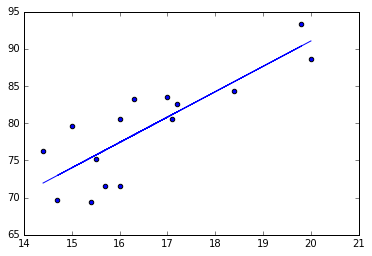

In [6]:
plt.scatter(df['Chirps/Second'].reshape(-1,1), df['Ground Temperature'].reshape(-1, 1))
plt.plot(df['Chirps/Second'].reshape(-1,1), crickets.predict(df['Chirps/Second'].reshape(-1,1)))

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a 
rate of 18 chirps per second. What was the approximate ground temperature that morning?

Answer(highlighted below): 84.2 degrees

In [7]:
crickets.predict(18)

array([[ 84.2347963]])

## The next few lines graph the opposite, with temps on the x-axis and chirps on the y-axis.

In [8]:
crickets.score(df['Chirps/Second'].reshape(-1,1), df['Ground Temperature'].reshape(-1, 1))

0.69229465291470027

In [9]:
temps = sklearn.linear_model.LinearRegression()

In [10]:
temps.fit(df['Ground Temperature'].reshape(-1,1), df['Chirps/Second'].reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

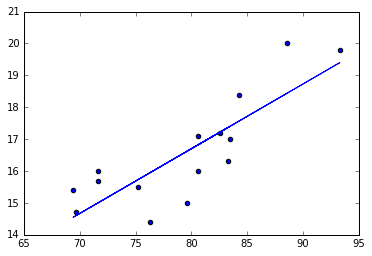

In [11]:
plt.scatter(df['Ground Temperature'].reshape(-1,1), df['Chirps/Second'].reshape(-1, 1))
plt.plot(df['Ground Temperature'].reshape(-1,1), temps.predict(df['Ground Temperature'].reshape(-1,1)))

Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?
    
Answer(highlighted below): 19.7 chirps

In [12]:
temps.predict(95)

array([[ 19.74428913]])

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Import and print sample data to help visualize

In [13]:
brain_body = pd.read_fwf("brain_body.txt")

In [14]:
brain_body.head(5)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


## Create linear object (Line 85), plug in data (86), and graph scatter graph and linear regression plot graph (87).

In [15]:
brain = sklearn.linear_model.LinearRegression()

In [16]:
brain.fit(brain_body['Brain'].reshape(-1,1), brain_body['Body'].reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

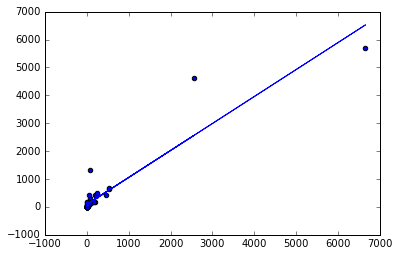

In [17]:
plt.scatter(brain_body['Brain'].reshape(-1,1), brain_body['Body'].reshape(-1, 1))
plt.plot(brain_body['Brain'].reshape(-1,1), brain.predict(brain_body['Brain'].reshape(-1,1)))

## Run score method for correlation strength (strong result)

In [18]:
brain.score(brain_body['Brain'].reshape(-1,1), brain_body['Body'].reshape(-1, 1))

0.87266208430433312

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

## Import dataframes. 

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
sex_list = [0, 5]
sex = pd.read_fwf('salary.txt', names=['Sex', 'Salary'], usecols=sex_list)

rank_list = [1, 5]
rank = pd.read_fwf('salary.txt', names=['Rank', 'Salary'], usecols=rank_list)

year_list = [2, 5]
year = pd.read_fwf('salary.txt', names=['Year', 'Salary'], usecols=year_list)

degree_list = [3, 5]
degree = pd.read_fwf('salary.txt', names=['Degree', 'Salary'], usecols=degree_list)

ysdeg_list = [4, 5]
ysdeg = pd.read_fwf('salary.txt', names=['YSdeg', 'Salary'], usecols=ysdeg_list)

## Linear Regression Equation 

In [4]:
salary_linear = sklearn.linear_model.LinearRegression()
sex_linear = sklearn.linear_model.LinearRegression()
rank_linear = sklearn.linear_model.LinearRegression()
year_linear = sklearn.linear_model.LinearRegression()
degree_linear = sklearn.linear_model.LinearRegression()
ysdeg_linear = sklearn.linear_model.LinearRegression()


In [6]:
salary_linear.fit(df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']], df[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Create LinearRegression Objects

## Compare salary with sex (0 male, 1 female)

0.063898925832880038

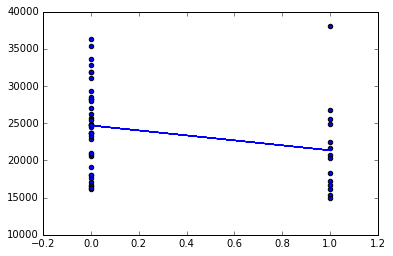

In [7]:
sex_linear.fit(sex[['Sex']], sex[['Salary']])
plt.scatter(sex[['Sex']], sex[['Salary']])
plt.plot(sex[['Sex']], sex_linear.predict(sex[['Sex']]))
sex_linear.score(sex[['Sex']], sex[['Salary']])


## Compare salary with sex rank.

0.75253605392746314

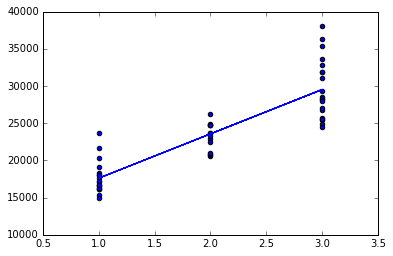

In [8]:
rank_linear.fit(rank[['Rank']], rank[['Salary']])
plt.scatter(rank[['Rank']], rank[['Salary']])
plt.plot(rank[['Rank']], rank_linear.predict(rank[['Rank']]))
rank_linear.score(rank[['Rank']], rank[['Salary']])


## Compare salary with years at currrent rank.

0.49093702676921624

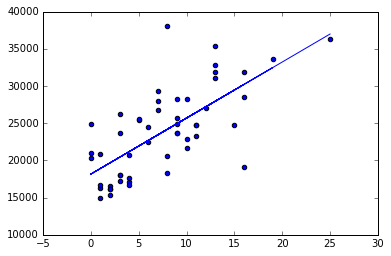

In [9]:
year_linear.fit(year[['Year']], year[['Salary']])
plt.scatter(year[['Year']], year[['Salary']])
plt.plot(year[['Year']], year_linear.predict(year[['Year']]))
year_linear.score(year[['Year']], year[['Salary']])

## Compare salary with degree. 

0.0048616809847483742

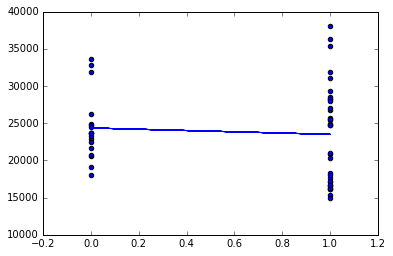

In [10]:
degree_linear.fit(degree[['Degree']], degree[['Salary']])
plt.scatter(degree[['Degree']], degree[['Salary']])
plt.plot(degree[['Degree']], degree_linear.predict(degree[['Degree']]))
degree_linear.score(degree[['Degree']], degree[['Salary']])

## Compare salary with years since highest degree acquired. 

0.45542813458360276

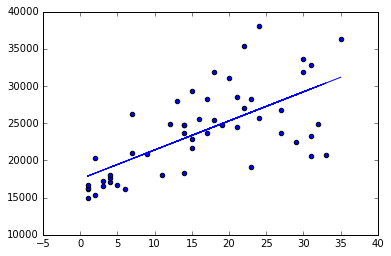

In [11]:
ysdeg_linear.fit(ysdeg[['YSdeg']], ysdeg[['Salary']])
plt.scatter(ysdeg[['YSdeg']], ysdeg[['Salary']])
plt.plot(ysdeg[['YSdeg']], ysdeg_linear.predict(ysdeg[['YSdeg']]))
ysdeg_linear.score(ysdeg[['YSdeg']], ysdeg[['Salary']])

## Using predict, we can create a random person and hypothesize their salary. 

In [13]:
random_person = [[1, 3, 7, 1, 28]]
salary_linear.predict(random_person)

array([[ 27852.72164756]])